In [1]:
# pip install imbalanced-learn
# pip install shap
# pip install lime

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Read the Excel file into a DataFrame
data = pd.read_csv('final-data.csv')

# Display the first few rows
# data.head()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  442 non-null    int64  
 1   Release Date                442 non-null    object 
 2   Type                        442 non-null    object 
 3   Text                        442 non-null    object 
 4   Sentiment Score             442 non-null    float64
 5   Sentiment Category          442 non-null    object 
 6   FinBERT Sentiment           442 non-null    object 
 7   FinBERT Score               442 non-null    float64
 8   Average Sentiment Score     442 non-null    float64
 9   Hawkish_Count               442 non-null    int64  
 10  Dovish_Count                442 non-null    int64  
 11  Hawkish_to_Dovish_Ratio     442 non-null    float64
 12  Hawkish_Weighted_Count      442 non-null    int64  
 13  Topic                       442 non

In [4]:
data['Decision'].value_counts()

Decision
+0.00%    198
+0.25%     66
-0.50%     28
-0.25%     22
+0.75%      8
+0.50%      6
-0.75%      4
-1.00%      3
Name: count, dtype: int64

In [5]:
# Handle Imbalanced Classes

data['Decision'] = data['Decision'].replace({'+0.75%': '+0.50%', '-0.75%': '-0.50%', '-1.00%': '-0.50%'})
data['Decision'].value_counts()

Decision
+0.00%    198
+0.25%     66
-0.50%     35
-0.25%     22
+0.50%     14
Name: count, dtype: int64

In [6]:
data = data.dropna(subset=['Decision'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 441
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  335 non-null    int64  
 1   Release Date                335 non-null    object 
 2   Type                        335 non-null    object 
 3   Text                        335 non-null    object 
 4   Sentiment Score             335 non-null    float64
 5   Sentiment Category          335 non-null    object 
 6   FinBERT Sentiment           335 non-null    object 
 7   FinBERT Score               335 non-null    float64
 8   Average Sentiment Score     335 non-null    float64
 9   Hawkish_Count               335 non-null    int64  
 10  Dovish_Count                335 non-null    int64  
 11  Hawkish_to_Dovish_Ratio     335 non-null    float64
 12  Hawkish_Weighted_Count      335 non-null    int64  
 13  Topic                       335 non-null

In [8]:
# Drop irrelevant columns and handle missing values
data = data.drop(columns=['Unnamed: 0', 'Release Date', 'Announcement Date', 'Type', 'Time', 'Forecast', 'Text', 'High_Point', 'Sentiment Category', 'FinBERT Sentiment'], errors='ignore')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 441
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sentiment Score             335 non-null    float64
 1   FinBERT Score               335 non-null    float64
 2   Average Sentiment Score     335 non-null    float64
 3   Hawkish_Count               335 non-null    int64  
 4   Dovish_Count                335 non-null    int64  
 5   Hawkish_to_Dovish_Ratio     335 non-null    float64
 6   Hawkish_Weighted_Count      335 non-null    int64  
 7   Topic                       335 non-null    int64  
 8   Topic_Probabilities         335 non-null    float64
 9   Text_Length                 335 non-null    int64  
 10  Word_Count                  335 non-null    int64  
 11  tightening                  335 non-null    float64
 12  inflation                   335 non-null    float64
 13  rate hike                   335 non-null

In [10]:
data = data.dropna()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 441
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sentiment Score             335 non-null    float64
 1   FinBERT Score               335 non-null    float64
 2   Average Sentiment Score     335 non-null    float64
 3   Hawkish_Count               335 non-null    int64  
 4   Dovish_Count                335 non-null    int64  
 5   Hawkish_to_Dovish_Ratio     335 non-null    float64
 6   Hawkish_Weighted_Count      335 non-null    int64  
 7   Topic                       335 non-null    int64  
 8   Topic_Probabilities         335 non-null    float64
 9   Text_Length                 335 non-null    int64  
 10  Word_Count                  335 non-null    int64  
 11  tightening                  335 non-null    float64
 12  inflation                   335 non-null    float64
 13  rate hike                   335 non-null

Original training class distribution:
Decision
+0.00%    138
+0.25%     46
-0.50%     25
-0.25%     15
+0.50%     10
Name: count, dtype: int64

Resampled training class distribution:
Decision
-0.50%    138
+0.00%    138
+0.50%    138
+0.25%    138
-0.25%    138
Name: count, dtype: int64
Accuracy Score: 0.8811881188118812

Classification Report:
               precision    recall  f1-score   support

      +0.00%       0.89      0.95      0.92        60
      +0.25%       0.85      0.85      0.85        20
      +0.50%       1.00      1.00      1.00         4
      -0.25%       0.67      0.29      0.40         7
      -0.50%       0.90      0.90      0.90        10

    accuracy                           0.88       101
   macro avg       0.86      0.80      0.81       101
weighted avg       0.87      0.88      0.87       101



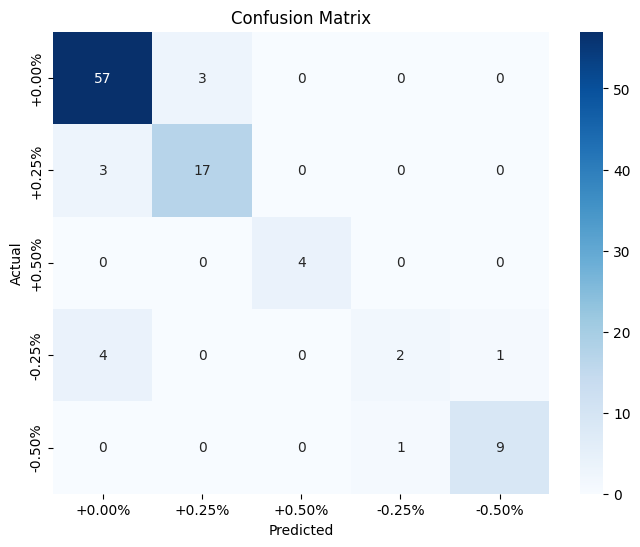

In [12]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Feature selection
features = data.drop(['Decision'], axis=1)  # 'Decision' is the target column
target = data['Decision']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)

# Apply SMOTE to balance classes in the training set
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify new class distribution
print("Original training class distribution:")
print(y_train.value_counts())
print("\nResampled training class distribution:")
print(pd.Series(y_train_resampled).value_counts())

# Initialize the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=1000)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(target), yticklabels=np.unique(target))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

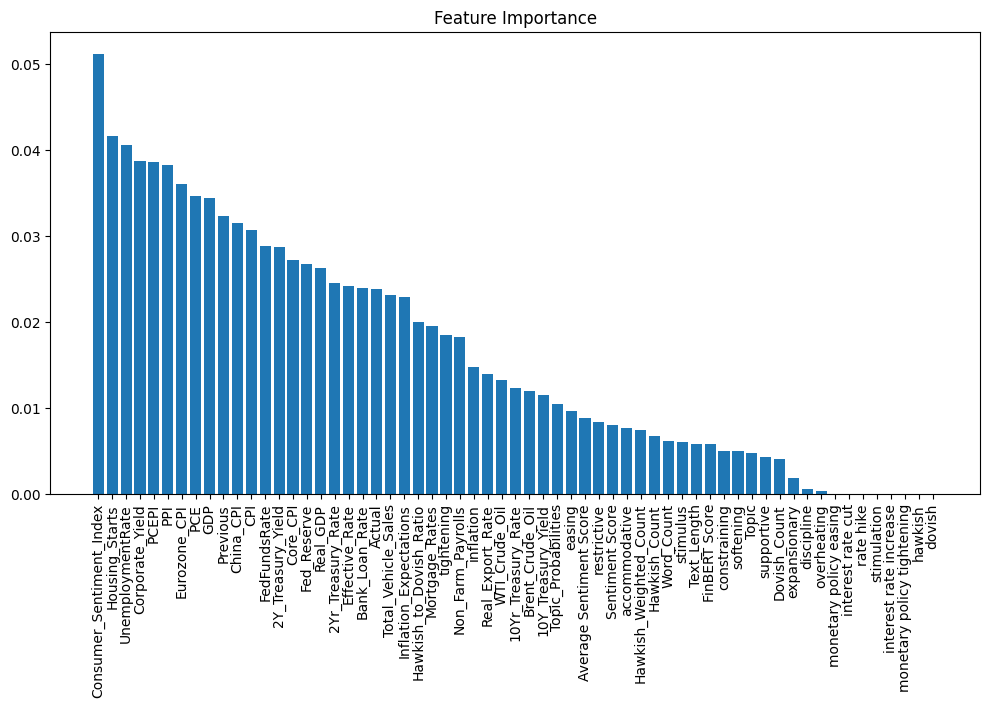

In [13]:
# Feature Importance
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(features.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(features.shape[1]), features.columns[sorted_indices], rotation=90)
plt.title("Feature Importance")
plt.show()

In [14]:
"""
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("\nBest Parameters from Grid Search:\n", grid_search.best_params_)

# Evaluate the tuned model
best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

print("\nTuned Model Accuracy Score:", accuracy_score(y_test, y_pred_tuned))
print("\nTuned Model Classification Report:\n", classification_report(y_test, y_pred_tuned))
"""

'\n# Hyperparameter tuning with GridSearchCV\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'n_estimators\': [100, 200, 300, 500, 1000],\n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\ngrid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=\'accuracy\', cv=3, verbose=2, n_jobs=-1)\ngrid_search.fit(X_train, y_train)\n\n# Best parameters\nprint("\nBest Parameters from Grid Search:\n", grid_search.best_params_)\n\n# Evaluate the tuned model\nbest_rf_model = grid_search.best_estimator_\ny_pred_tuned = best_rf_model.predict(X_test)\n\nprint("\nTuned Model Accuracy Score:", accuracy_score(y_test, y_pred_tuned))\nprint("\nTuned Model Classification Report:\n", classification_report(y_test, y_pred_tuned))\n'

Observation probabilities (summing to 1):
Observation 1: [0.372 0.61  0.    0.002 0.016], Sum: 1.0
Observation 2: [0.496 0.405 0.    0.056 0.043], Sum: 1.0
Observation 3: [0.577 0.04  0.004 0.32  0.059], Sum: 1.0
Observation 4: [0.252 0.036 0.014 0.327 0.371], Sum: 1.0
Observation 5: [0.983 0.01  0.    0.002 0.005], Sum: 1.0
Accuracy: 0.8811881188118812
              precision    recall  f1-score   support

      +0.00%       0.89      0.95      0.92        60
      +0.25%       0.85      0.85      0.85        20
      +0.50%       1.00      1.00      1.00         4
      -0.25%       0.67      0.29      0.40         7
      -0.50%       0.90      0.90      0.90        10

    accuracy                           0.88       101
   macro avg       0.86      0.80      0.81       101
weighted avg       0.87      0.88      0.87       101



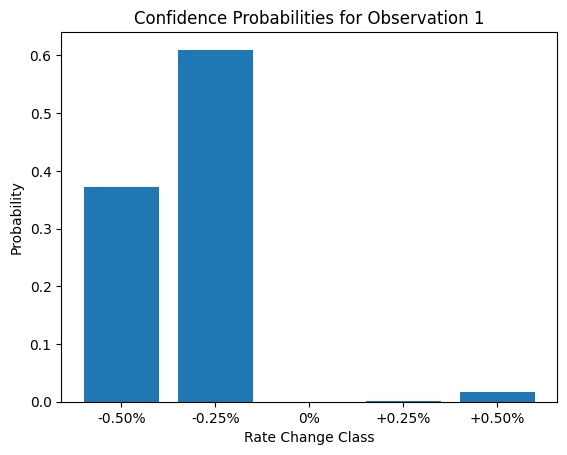

In [15]:
# Predict probabilities
probabilities = rf_model.predict_proba(X_test)

# Display probabilities for the first 5 samples (as an example)
print("Observation probabilities (summing to 1):")
for i in range(5):
    print(f"Observation {i+1}: {probabilities[i]}, Sum: {sum(probabilities[i])}")

# Evaluate the model
predictions = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

# Visualize confidence probabilities for a specific sample
observation_idx = 0
classes = ['-0.50%', '-0.25%', '0%', '+0.25%', '+0.50%']
plt.bar(classes, probabilities[observation_idx])
plt.title(f"Confidence Probabilities for Observation {observation_idx + 1}")
plt.xlabel("Rate Change Class")
plt.ylabel("Probability")
plt.show()

In [16]:
# Cross-validation to validate model stability
cv_scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validation Accuracy Scores: [0.91304348 0.96376812 0.97101449 0.96376812 0.97826087]
Mean CV Accuracy: 0.9579710144927536


In [17]:
# Macro-Averaged F1-Score Explicitly

from sklearn.metrics import f1_score

macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro-Averaged F1-Score: {macro_f1:.2f}")

Macro-Averaged F1-Score: 0.81


In [49]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Define the correct order of the classes
class_order = ['-0.50%', '-0.25%', '0%', '+0.25%', '+0.50%']

# Initialize the LIME explainer with correct class order
explainer = LimeTabularExplainer(
    training_data=X_train.values,  # Use the training data
    mode='classification',
    feature_names=X_train.columns,  # Feature names for interpretability
    class_names=class_order,  # Correctly ordered target class names
    discretize_continuous=True
)

# Explain a single prediction
observation_idx = 0  # Index of the observation to explain
exp = explainer.explain_instance(
    X_test.iloc[observation_idx].values,  # Observation to explain
    rf_model.predict_proba,  # Predict function of the model
    num_features=10  # Number of features to show in the explanation
)

# Display the explanation
exp.show_in_notebook(show_table=True)  # Interactive explanation in a Jupyter Notebook
exp.save_to_file('lime_explanation.html')  # Save explanation to an HTML file

C:\Users\yunus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


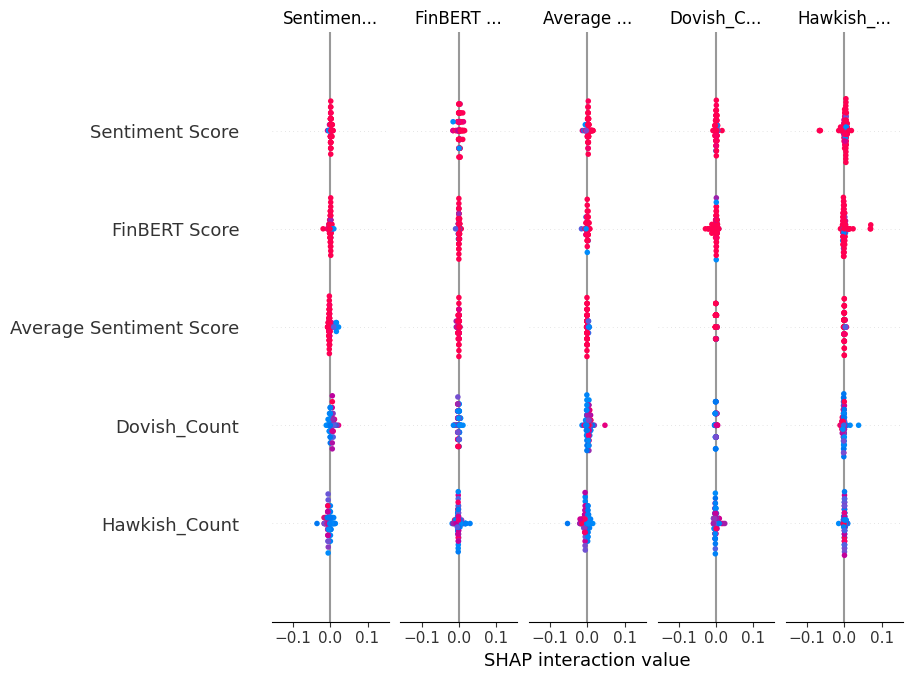

In [24]:
# SHAP
import shap

# SHAP explanation
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type='bar')

Original training class distribution:
0    138
1     46
4     25
3     15
2     10
Name: count, dtype: int64

Resampled training class distribution:
4    138
0    138
2    138
1    138
3    138
Name: count, dtype: int64


C:\Users\yunus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:06:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy Score: 0.8217821782178217

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93        60
           1       0.78      0.70      0.74        20
           2       0.38      0.75      0.50         4
           3       0.40      0.29      0.33         7
           4       0.88      0.70      0.78        10

    accuracy                           0.82       101
   macro avg       0.67      0.68      0.66       101
weighted avg       0.83      0.82      0.82       101



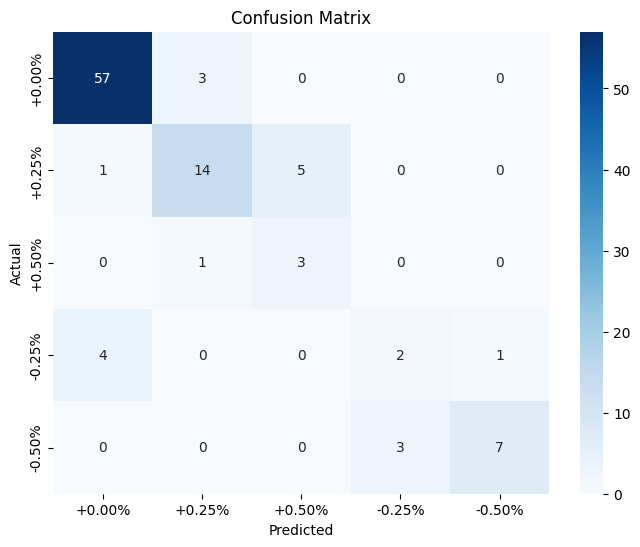

In [34]:
"""
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Feature selection
features = data.drop(['Decision'], axis=1)  # 'Decision' is the target column
target = data['Decision']

# Label encode the target variable (convert categorical values to numeric)
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.3, random_state=42, stratify=target_encoded)

# Apply SMOTE to balance classes in the training set
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify new class distribution
print("Original training class distribution:")
print(pd.Series(y_train).value_counts())
print("\nResampled training class distribution:")
print(pd.Series(y_train_resampled).value_counts())

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(scale_pos_weight=1, random_state=42, n_estimators=1000, eval_metric="mlogloss")

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
"""

Original training class distribution:
Decision
+0.00%    138
+0.25%     46
-0.50%     25
-0.25%     15
+0.50%     10
Name: count, dtype: int64

Resampled training class distribution:
Decision
-0.50%    138
+0.00%    138
+0.50%    138
+0.25%    138
-0.25%    138
Name: count, dtype: int64
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9849
[LightGBM] [Info] Number of data points in the train set: 690, number of used features: 52
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] 

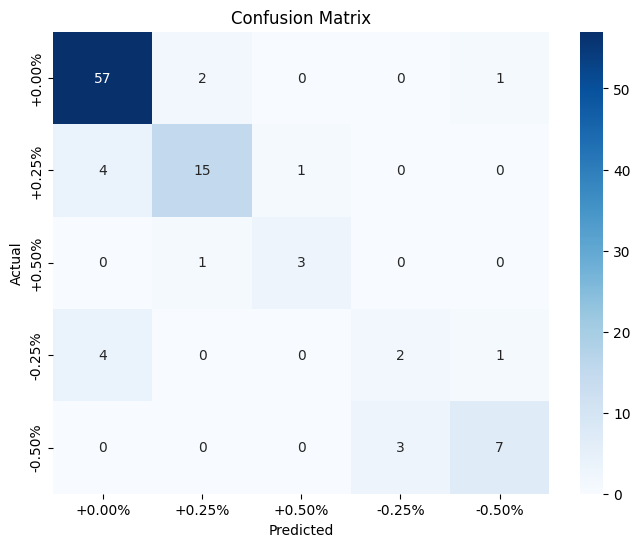

In [30]:
"""
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Feature selection
features = data.drop(['Decision'], axis=1)  # 'Decision' is the target column
target = data['Decision']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)

# Apply SMOTE to balance classes in the training set
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify new class distribution
print("Original training class distribution:")
print(y_train.value_counts())
print("\nResampled training class distribution:")
print(pd.Series(y_train_resampled).value_counts())

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(class_weight='balanced', random_state=42, n_estimators=1000, verbose=-1)

# Train the model
lgb_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = lgb_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(target), yticklabels=np.unique(target))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
"""

Original training class distribution:
0    138
1     46
4     25
3     15
2     10
Name: count, dtype: int64

Resampled training class distribution:
4    138
0    138
2    138
1    138
3    138
Name: count, dtype: int64
Accuracy Score: 0.8316831683168316

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93        60
           1       0.75      0.75      0.75        20
           2       0.43      0.75      0.55         4
           3       0.50      0.29      0.36         7
           4       0.89      0.80      0.84        10

    accuracy                           0.83       101
   macro avg       0.70      0.70      0.69       101
weighted avg       0.83      0.83      0.83       101



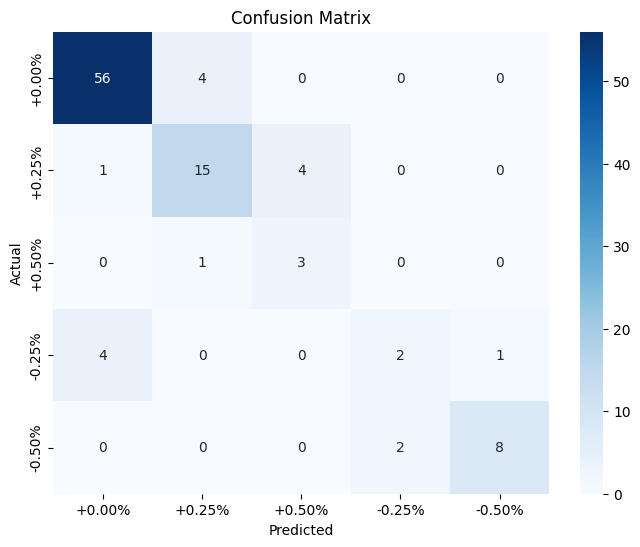

In [36]:
"""
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Feature selection
features = data.drop(['Decision'], axis=1)  # 'Decision' is the target column
target = data['Decision']

# Label encode the target variable (convert categorical values to numeric)
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.3, random_state=42, stratify=target_encoded)

# Apply SMOTE to balance classes in the training set
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify new class distribution
print("Original training class distribution:")
print(pd.Series(y_train).value_counts())
print("\nResampled training class distribution:")
print(pd.Series(y_train_resampled).value_counts())

# Calculate class weights based on class distribution in the training set
class_weights = dict(zip(range(len(label_encoder.classes_)), 
                         (len(y_train_resampled) / np.bincount(y_train_resampled))))

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(iterations=1000, random_state=42, class_weights=class_weights, verbose=0)

# Train the model
catboost_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = catboost_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
"""

In [44]:
"""
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('catb', catboost_model),
    ('lgbm', lgb_model)
], voting='soft')
voting_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
"""

C:\Users\yunus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:33:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9849
[LightGBM] [Info] Number of data points in the train set: 690, number of used features: 52
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=1000,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('catb',
                              <catboost.core.CatBoostClassifier object at 0x000001E524787B00>),
                             ('lgbm',
                              LGBMClassifier(class_weight='balanced',
                                             n_estimators=1000,
                                             random_state=42))])